# Problem statement(crime-data)
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

# Import libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load Data

In [89]:
crime=pd.read_csv(r'C:\Users\BIS\Desktop\DATA SCIENCE ASSIGNMENTS\Clustering\crime_data.csv')

In [90]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [91]:
crime.shape

(50, 5)

In [94]:
#Renaming the Unnamed: 0 Column into State
crime.rename({'Unnamed: 0':'State'}, axis=1, inplace=True)
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Data Exploration

In [95]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [96]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [97]:
crime.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [98]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

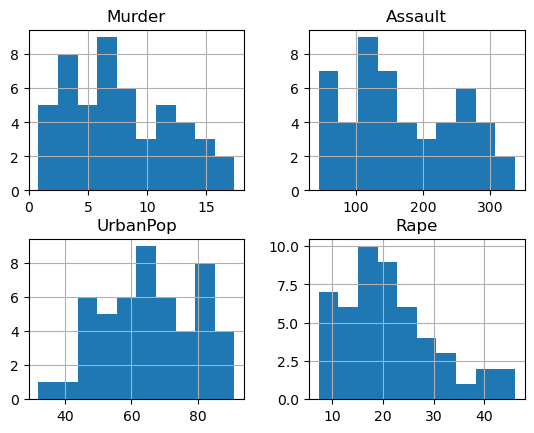

In [99]:
crime.hist()

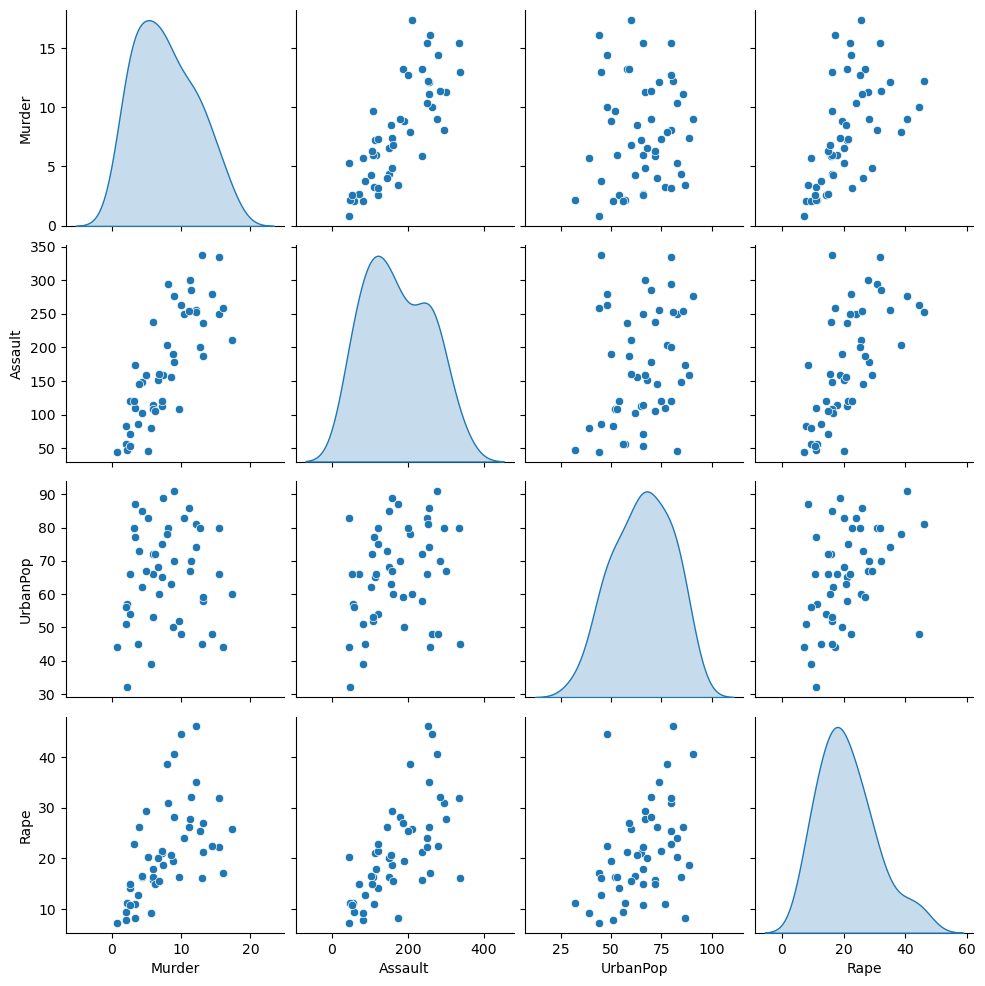

In [100]:
sns.pairplot(crime, diag_kind="kde")

In [101]:
crime.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

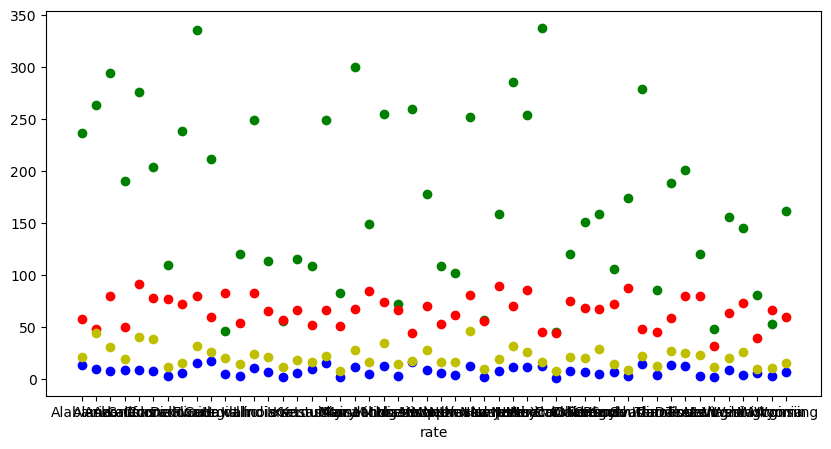

In [102]:
plt.figure(figsize=(10,5))
plt.scatter(crime.State,crime.Murder, color='b')
plt.scatter(crime.State,crime.Assault, color='g')
plt.scatter(crime.State,crime.UrbanPop, color='r')
plt.scatter(crime.State,crime.Rape, color='y')
plt.xlabel('State')
plt.xlabel('rate')
plt.show()

In [18]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [104]:
crime_norm=norm_func(crime.iloc[:,1:])

In [105]:
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Create and plot dendrogram

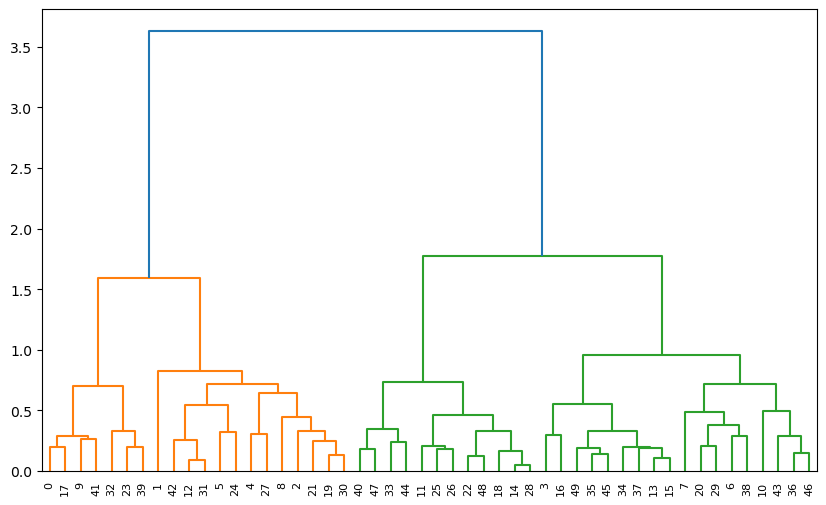

In [106]:
#Using ward method
plt.figure(figsize=(10,6))
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='ward'))

In [39]:
#Hierarchical clustering, we considering n of clusters as 3) 
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [107]:
#prediction - there is no centroid in agglomerative options
y_hc = hc.fit_predict(crime_norm)
y_hc

C:\Users\BIS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [112]:
#3 clusters are formed.
#creating new dataframe column as clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
crime_norm['Hierarchical_clusterid']=Clusters

In [113]:
crime_norm

,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [114]:
crime_norm.groupby('Hierarchical_clusterid').agg(['mean']).reset_index()

,Hierarchical_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.684639,0.720034,0.616949,0.564987
1,1,0.316600,0.325533,0.666667,0.294143
2,2,0.138052,0.106164,0.340395,0.117140


In [115]:
crime1['Hierarchical_clusterid'].value_counts()

0    20
1    18
2    12
Name: Hierarchical_clusterid, dtype: int64

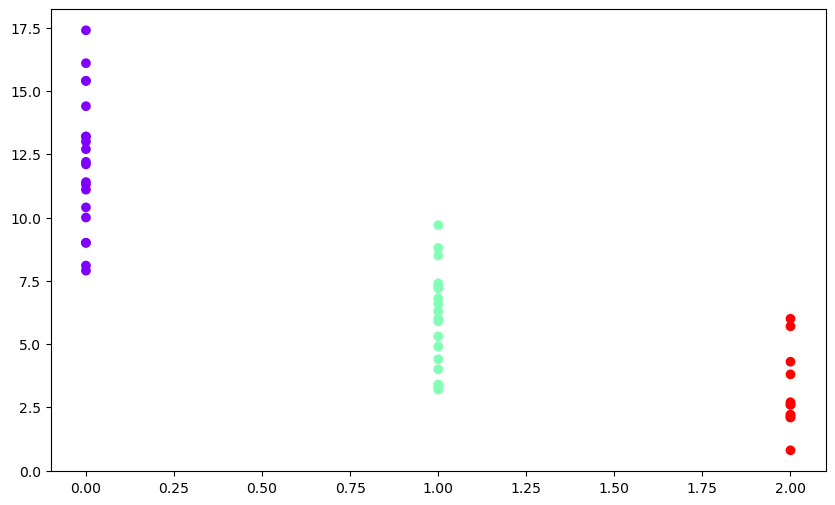

In [60]:
#plot clusters
plt.figure(figsize=(10,6))
plt.scatter(crime1['Hierarchical_clusterid'],crime1['Murder'], c=hc.labels_, cmap='rainbow')

In [ ]:
#Hence 3 clusters formed